In [4]:
import pandas as pd
import findspark
findspark.init("C:\Spark\spark-2.4.5-bin-hadoop2.7")
 




In [6]:
import pyspark
from pyspark import SparkContext



In [8]:
sc=SparkContext(master="local")
sc



ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at <ipython-input-7-91ca39cf9991>:1 

In [9]:
sc.appName

'pyspark-shell'

In [10]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'binaryRecords',
 'broadcas

In [12]:
sc.stop()

In [13]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .getOrCreate()



sc = spark.sparkContext
sc






<SparkContext master=local appName=pyspark_uygulama>

In [16]:
spark_df=spark.read.csv(r"C:\Users\simay\Desktop\dataset\verşsetleri\diabetes.csv", header = True, inferSchema = True)
                        
                        


In [20]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [21]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [23]:
spark_df.cache() ##verimizi sparkta çeşitli işlemler için işlenebilir hale getirmiş olduk.
#hızlı kullnım ram'e taşımak gibi




DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [24]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])




In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
#pysapark bazı fonksşyonları çalıştırmaz

#pandas data frame i paralel olarak çalışma özelliğine sahip değil.
#spark data frami parallel nodelerda clusterda çalışabilir.

#pandas veri manipülasyonu daha zengin
#spark data frame i immutuble ,dönüşürme işlemi yaparız.

df.head()






,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [29]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [30]:
df.dtypes





carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [32]:
spark_df.dtype() #çalışmadı





AttributeError: 'DataFrame' object has no attribute 'dtype'

In [34]:
df.ndim

2

In [35]:
df.size

377580

In [37]:
spark_df.size # çalıştırmadı.

AttributeError: 'DataFrame' object has no attribute 'size'

In [40]:
spark_df.show(5,truncate=True)




+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [41]:
spark_df.show(2)





+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [42]:
spark_df.count() #gözlem sayısına erişme

768

In [46]:
spark_df.columns #değişken isimlerine erişme





['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [48]:
len(spark_df.columns) #değişken sayısına erişme 






9

In [49]:
spark_df.describe().show() #özet istatistikler





+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [51]:
#tek değişken için istatistikesel özet
spark_df.describe("BloodPressure").show() #özet istatistikler







+-------+------------------+
|summary|     BloodPressure|
+-------+------------------+
|  count|               768|
|   mean|       69.10546875|
| stddev|19.355807170644777|
|    min|                 0|
|    max|               122|
+-------+------------------+



In [52]:
## değişken seçme .Select komutuyla olur.
spark_df.select("Glucose","Pregnancies").show(5)






+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [53]:
spark_df.select("BloodPressure","Pregnancies").show(3)







+-------------+-----------+
|BloodPressure|Pregnancies|
+-------------+-----------+
|           72|          6|
|           66|          1|
|           64|          8|
+-------------+-----------+
only showing top 3 rows



In [54]:
spark_df.select("Glucose").distinct().count()#bir değişken üzerinden eşsiz değer sayısına erişmek istersek

#136 unique observation 



136

In [57]:
#bir değişken üzerinden eşsiz değerin kendisine erişmek istersek

spark_df.select("Glucose").dropDuplicates().show()






+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [58]:
spark_df.select("Glucose").dropDuplicates().count() #doğrulama istersek

136

In [59]:
spark_df.crosstab("Outcome","Pregnancies").show()




+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [60]:
##Eksisk gözlemlerin sayısı
spark_df.dropna().count()






768

In [61]:
spark_df.dropna().show()
#eksik gözlemlerden kurtulmak istersek






+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


## gozlem secme





In [62]:
spark_df.filter(spark_df.Age >40).count()
#Age değişkneinde yaşı 40 tan büyük olanlar gelsin.Sayılarını gözter yaşı 40 tan büyük olanların




194

In [63]:
spark_df.groupby("Outcome").count().show()

#gruplama işlemi yapamk istersek.
#Bağımlı değişkenimiz olan diesbet hastalığına sahip olup olmayanların sayısını gösterdi



+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [64]:
###
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)





+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [65]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()
#gruplama işlemi sonrası gruplara göre değişkenlerin ortalamalrını alma.





+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



#### bir değişken ekleme Değişken silme işlemleri





In [67]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



#####  Varolan Değişkenin ismini değiştirme:





In [68]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns



['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [70]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").show()





+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|               1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|               0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|               1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|               0|
|          3|     7

In [71]:
spark_df.show(3)





+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



###  değişken silme



In [74]:
spark_df.drop("Insulin").columns

spark_df.show(2)




+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [80]:
a = spark_df.groupby("Outcome").count().show() 
#1 in bilgisine erişemiyoruz .to.pandas()fonksiyonu kullanarak pandasa çevirip erişmeleri yapabiliriz.
#python ve sparkı birlikte kullandığımızda python tarafına bazı verileri spark tarafından çekip localde kullanıp 
#işlem yapamak istediğimizde to.pandas fonkisiyonu   kullnırız.
a

#spark hızlı 
#locale çekip yola devm edicez.




+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [82]:
a = spark_df.groupby("Outcome").count().toPandas()
#spark dataframe den pandas data frame dönmüş oldu.

a



,Outcome,count
0,1,268
1,0,500


In [83]:
a.iloc[1,1] 


500

## SQL İşlemleri





In [85]:
spark_df.registerTempTable("table_df")

#spark_df üzerinde table_df oluşturdum registerTempTable fons-ksiyonu kullanarak.

spark.sql("show databases").show() #default isimli veri tabanı var
#



+------------+
|databaseName|
+------------+
|     default|
+------------+



In [86]:
#tabloları görüntülem istersek.üzerind eişlem yapacağımızı veriler burda.
spark.sql("show tables").show()




+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



In [87]:
spark.sql("select Glucose from table_df").show(5)




+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [88]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)


+-------+------------------+
|Outcome|      avg(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Büyük Veri Görselleştirme



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#localdeki veriyi spark dataframe çevirmiştik.
#veriyi görselleştirmek için aggregate edip
#sparkt üzerinden indirgeme yapıp dönüştürmek sonra pandasa dönüştürüp sona görselleştirme yapmak laızım.


In [90]:
#sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)
sdf = spark_df.toPandas()
sdf.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\simay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


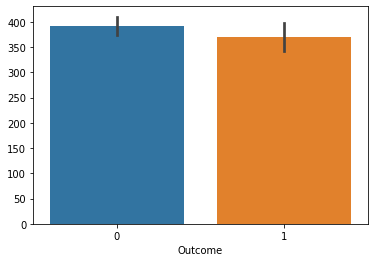

In [91]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)



# Büyük Veride Makine Öğrenmesi


In [93]:

spark_df=spark.read.csv(r"C:\Users\simay\Desktop\dataset\churn.csv",
                        header = True, 
                        inferSchema = True,
                         sep = ",")
                        
        
#müşterilerin bizi terk edip terk etmeme durumunu modelleyeceğiz.



In [94]:

spark_df.printSchema()




root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [95]:
spark_df.show(5)





+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [117]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns]) #tüm değişken isimlerini küçük harfe çevir.


In [118]:
spark_df.show(5)


+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [99]:
#df.columns = map(str.lower, df.columns)
spark_df = spark_df.withColumnRenamed("_c0", "index") #index olduğunu iafede ettik cp inin
spark_df.show(2)




+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [101]:
spark_df.count() #gözlem sayısı

900

In [102]:
len(spark_df.columns) #değişken sayısı

8

In [103]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [106]:
spark_df.distinct().count()

900

In [107]:
spark_df.select("names").distinct().count()

899

In [108]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3) #name sdeğişkenini say ve en fazla tekar edeni 
#ilk sıraaya getir.



+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [109]:
spark_df.filter(spark_df.names == "Jennifer Wood").show() #jennifer wood aynı kişi mi yoksa farklı kişi mi

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [110]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)




+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [111]:
spark_df.where(spark_df.index == 439).select("names").show()




+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [113]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"] ##indexten kişiye erişme
#amacım bu çıktıları girdi olarak kullanmak.




In [114]:
type(jen)



str

In [115]:

dir(jen)



['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [116]:
jen.upper()

'JENNIFER WOOD'

## Keşifçi Veri Analizi





In [119]:
print(spark_df.describe().show())





+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [120]:
#değişken seçme
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()





,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [121]:
#chur dengesiz veri olabilir. mean sıfıra yakın yüzde 15civarında dengesiz veri 
spark_df.filter(spark_df.age > 47).count()
#merkezi eğilim+std farklı kaç kişi




161

In [122]:
spark_df.groupby("churn").count().show()





+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [123]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show() #satın almak ile churn olma yada 
#olmama durumu arasında fark yok gibi


+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [124]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [128]:
kor_data = spark_df.drop("index","names").toPandas() #korelasyon oluşturmak istiyoeum



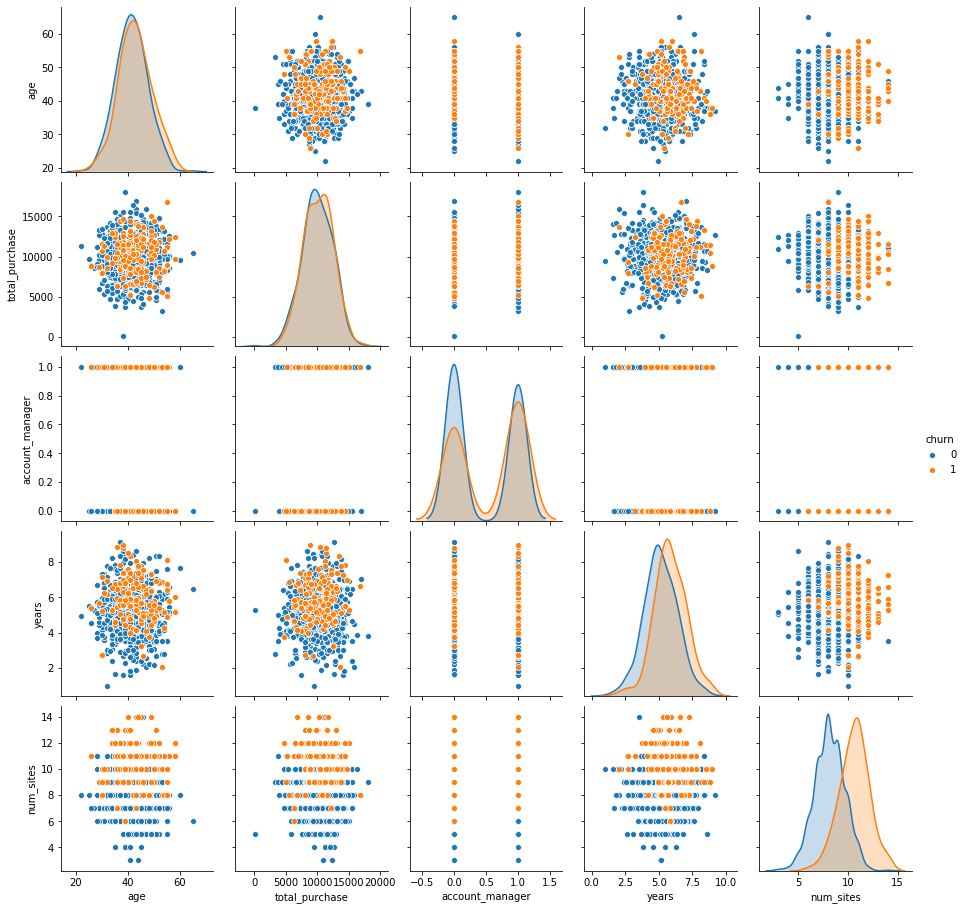

In [129]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn"); #churnu byut olarak ekledik




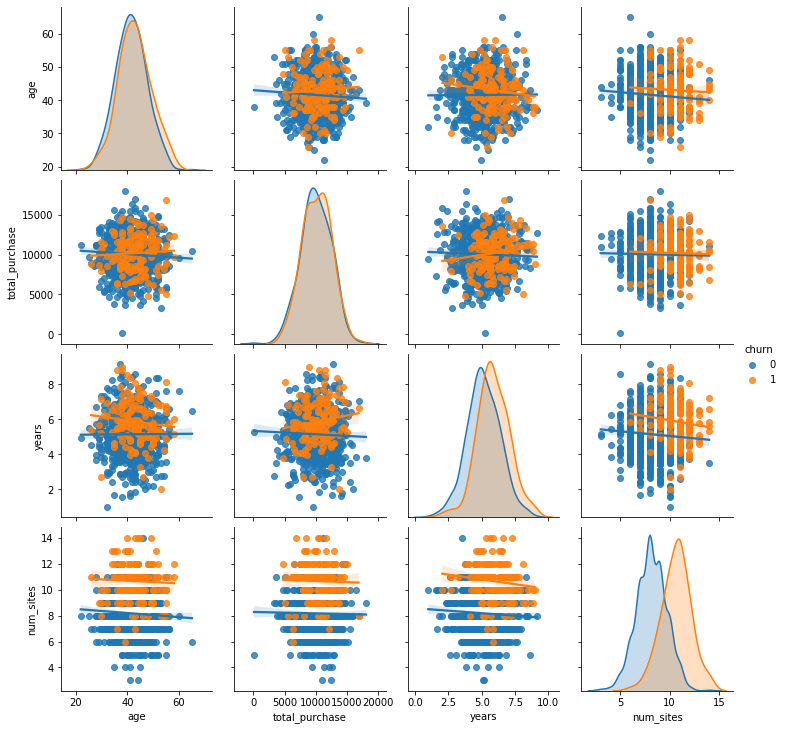

In [127]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"], 
             hue = "churn",
            kind = "reg");





## Veri Ön İşleme


In [130]:
spark_df = spark_df.dropna()

In [131]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [132]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [145]:
from pyspark.ml.feature import StringIndexer
stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label")
#bağımlı değişkenim numerikti ama string dönüşümü yaptık.
#stringIndexer i dönüştürdü ibağımlı değişkenlere label ,bağımsız değişkenlere feauture demiş oluruz.
indexed = stringIndexer.fit(spark_df).transform(spark_df)




IllegalArgumentException: 'requirement failed: Output column label already exists.'

In [136]:
indexed.dtypes #labelı int dönüştürcez

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [139]:
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))




In [141]:
spark_df.dtypes
#bağımlı değişkeni ayarlamış olduk.




[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

#### bagimsiz degiskenlerin ayarlanmasi




In [143]:
from pyspark.ml.feature import VectorAssembler 

In [147]:
spark_df.columns

bag = ["age","total_purchase", "account_manager","years","num_sites"] #bağımsız degişkenlerden vektör oluşturucaz
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")
#çıktı outputu ne olcak= "features"
#bağımsız değişkenlerde dönüşüm işlemini yapacak vektör nesnesi oluşturduk.


In [148]:
va_df = vectorAssembler.transform(spark_df)





In [149]:
final_df = va_df.select(["features","label"])
final_df.show() # feauters dediği tek bir değişkencesine  vektör artık bu ilabel dediği bağımlı değişken .
#pysparkın ml öğrenmesinde böyle fauters ve label yapısı vardır. bunu oluşturduk.





+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



### Test- Train Split

In [152]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df=splits[1]


In [153]:
train_df

DataFrame[features: vector, label: int]

In [155]:
test_df



DataFrame[features: vector, label: int]

# GBM ile Müşteri Terk Modellemesi

In [158]:
from pyspark.ml.classification import GBTClassifier

In [159]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label")
gbm_model = gbm.fit(train_df)




In [160]:
y_pred = gbm_model.transform(test_df)
y_pred




DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [161]:
ac = y_pred.select("label","prediction")





In [162]:
ac.filter(ac.label == ac.prediction).count() / ac.count() #bu accuracy değeri
#valide edilmemiş test haasu cross validation yönytemi kullanmalıyız.



0.8252788104089219

In [163]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator() #değerlendirme yöntemimizi nesne olarak oluşturma

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build()) #parametre grid oluştrduk.

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 10)
#cv nesnenesi oluşturduk ,estimator olarak verilen oluşturulan model nesnesi,10 katlı olucak








In [164]:
cv_model = cv.fit(train_df) #tarin veri seti üzerinden modeli fit et.
#yukardaki parametre setlerinde karşılık oluşabilecek optimumum model.



In [165]:
y_pred = cv_model.transform(test_df) 
ac = y_pred.select("label","prediction")#seçme işlemi yaptık




In [166]:
ac.filter(ac.label == ac.prediction).count() / ac.count() #accuracy değeri



0.8736059479553904

In [167]:
evaluator.evaluate(y_pred) #AUC değeri eğri altında kalan alan

0.8599344204182915

#### Bu müşteriler bizi terk eder mi?

In [168]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})


In [169]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,30000,1,8,6
4,Ata Bakmayan Ali,40,100000,1,30,50


In [171]:
yeni_sdf = spark.createDataFrame(yeni_musteriler) #pandas dataframe i spark dataframe çevirdim

In [172]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [173]:

yeni_sdf.show()




+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [175]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf) #yeni müşteriler vektör formuna çevirdim.

In [178]:
sonuclar = cv_model.transform(yeni_musteriler) 
#modeli içine koyduk
#optimize edilmiş tuning parametreleri ile kullnıyoruz.
#predict foksiyonu gibi düşün trasnform fonksiyonu




In [177]:
sonuclar.select("names","prediction").show() #işlem sonuçlarına erişmek istedik.

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+



## Diğer Bazı Modeller

In [180]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()




0.862453531598513

In [181]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()






0.8550185873605948

In [179]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()






0.8513011152416357

In [182]:
sc.stop()